# Ames Housing Project Suggestions

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

1. During basic EDA, you identify many missing values in a column/feature.
2. You consult the data dictionary and use domain knowledge to decide _what_ is meant by this missing feature.
3. You impute a reasonable value for the missing value.
4. You plot the distribution of your feature.
5. You realize what you imputed has negatively impacted your data quality.
6. You cycle back, re-load your clean data, re-think your approach, and find a better solution.

Then you move on to your next feature. _There are dozens of features in this dataset._

Figuring out programmatically concise and repeatable ways to clean and explore your data will save you a lot of time.

The outline below does not necessarily cover every single thing that you will want to do in your project. You may choose to do some things in a slightly different order. Many students choose to work in a single notebook for this project. Others choose to separate sections out into separate notebooks. Check with your local instructor for their preference and further suggestions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# Let's import both data sets
# Understanding what both data sets represents really helps showcase 
    # what we're actually doing.
# Our main data set for this project is the train data set which is what we're going to use to 
    # make our model.
# Our test data set is the 'same' as our train but missing a column & we're 'testing' our 
    # model on this to make predications or make that missing column understandable.
train = pd.read_csv('/Users/AakashSharma/Documents/DSI/Submissions/Project2/datasets/train.csv')
test = pd.read_csv('/Users/AakashSharma/Documents/DSI/Submissions/Project2/datasets/test.csv')


## EDA

- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

In [3]:
# Let's do some data cleaning & remove all the spaces in between the variable names & replace
    # them w/ string '_' to help with plugging our variable names in.
train.columns = train.columns.str.replace(" ", "_")
test.columns = test.columns.str.replace(" ", "_")
train.columns = train.columns.str.replace("/", "_")
test.columns = test.columns.str.replace("/", "_")

In [4]:
# We need to make sure our test & train data sets are similar as in string/int/float types.
# We need to make sure the amount of values & what is stored in those values is the SAME.
# Otherwise we get an inaccurate data model to test on our data for predictions. 
# If we get a good model for train that doesn't mean that the model will work well on the test.
# Let's search for any null values for both
train.isnull().sum().sum()

9822

In [5]:
test.isnull().sum().sum()

4175

In [6]:
# Let's just drop any null rows for both data sets.
train.dropna()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice


In [7]:
test.dropna()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type


In [8]:
# Here's a function to convert NaN's in the data set to 0 for numeric.
def convert_numeric_nan(data, column):
    return data[column].replace(np.nan, 0, inplace = True)
# Let's then apply the function to all the numeric columns that are in both data sets.
convert_numeric_nan(train, 'Lot_Frontage')
convert_numeric_nan(test, 'Lot_Frontage')
convert_numeric_nan(train, 'Mas_Vnr_Area')
convert_numeric_nan(test, 'Mas_Vnr_Area')
convert_numeric_nan(train, 'Garage_Yr_Blt')
convert_numeric_nan(test, 'Garage_Yr_Blt')
convert_numeric_nan(train, 'Garage_Cars')
convert_numeric_nan(test, 'Garage_Cars')
convert_numeric_nan(train, 'Garage_Area')
convert_numeric_nan(test, 'Garage_Area')
convert_numeric_nan(train, 'Bsmt_Full_Bath')
convert_numeric_nan(train, 'Bsmt_Half_Bath')
convert_numeric_nan(train, 'BsmtFin_SF_1')
convert_numeric_nan(train, 'BsmtFin_SF_2')
convert_numeric_nan(train, 'Bsmt_Unf_SF')
convert_numeric_nan(train, 'Total_Bsmt_SF')

In [9]:
# Here's a function to convert NaN's in the data set to 'None' for strings.
def convert_str_nan(data, column):
    return data[column].replace(np.nan, 'None', inplace = True)

In [10]:
# Another way of changing the value of a row in a certain column or all instances of NaN, is
    # to use the .fillna() function on the data frame & have that equal to the data frame so the
    # changes actually save. 
# Below we have done this, here's an example
train['Alley'] = train.Alley.fillna('None')
test['Alley'] = test.Alley.fillna('None')
train['Mas_Vnr_Type'] = train.Mas_Vnr_Type.fillna('None')
test['Mas_Vnr_Type'] = test.Mas_Vnr_Type.fillna('None')
train['Fireplace_Qu'] = train.Fireplace_Qu.fillna('None')
test['Fireplace_Qu'] = test.Fireplace_Qu.fillna('None')
train['Garage_Type'] = train.Garage_Type.fillna('None')
test['Garage_Type'] = test.Garage_Type.fillna('None')
train['Garage_Finish'] = train.Garage_Finish.fillna('None')
test['Garage_Finish'] = test.Garage_Finish.fillna('None')
train['Garage_Qual'] = train.Garage_Qual.fillna('None')
test['Garage_Qual'] = test.Garage_Qual.fillna('None')
train['Garage_Cond'] = train.Garage_Cond.fillna('None')
test['Garage_Cond'] = test.Garage_Cond.fillna('None')
train['Pool_QC'] = train.Pool_QC.fillna('None')
test['Pool_QC'] = test.Pool_QC.fillna('None')
train['Fence'] = train.Fence.fillna('None')
test['Fence'] = test.Fence.fillna('None')
train['Misc_Feature'] = train.Misc_Feature.fillna('None')
test['Misc_Feature'] = test.Misc_Feature.fillna('None')
train['Electrical'] = train.Electrical.fillna('None')
test['Electrical'] = test.Electrical.fillna('None')
train['Bsmt_Qual'] = train.Bsmt_Qual.fillna('None')
test['Bsmt_Qual'] = test.Bsmt_Qual.fillna('None')
train['Bsmt_Cond'] = train.Bsmt_Cond.fillna('None')
test['Bsmt_Cond'] = test.Bsmt_Cond.fillna('None') 
train['Bsmt_Exposure'] = train.Bsmt_Exposure.fillna('None')
test['Bsmt_Exposure'] = test.Bsmt_Exposure.fillna('None') 
train['BsmtFin_Type_1'] = train.BsmtFin_Type_1.fillna('None')
test['BsmtFin_Type_1'] = test.BsmtFin_Type_1.fillna('None') 
train['BsmtFin_Type_2'] = train.BsmtFin_Type_2.fillna('None')
test['BsmtFin_Type_2'] = test.BsmtFin_Type_2.fillna('None')

In [11]:
# Let's double check the data types for the train set.
train.dtypes

Id                  int64
PID                 int64
MS_SubClass         int64
MS_Zoning          object
Lot_Frontage      float64
Lot_Area            int64
Street             object
Alley              object
Lot_Shape          object
Land_Contour       object
Utilities          object
Lot_Config         object
Land_Slope         object
Neighborhood       object
Condition_1        object
Condition_2        object
Bldg_Type          object
House_Style        object
Overall_Qual        int64
Overall_Cond        int64
Year_Built          int64
Year_Remod_Add      int64
Roof_Style         object
Roof_Matl          object
Exterior_1st       object
Exterior_2nd       object
Mas_Vnr_Type       object
Mas_Vnr_Area      float64
Exter_Qual         object
Exter_Cond         object
                   ...   
Half_Bath           int64
Bedroom_AbvGr       int64
Kitchen_AbvGr       int64
Kitchen_Qual       object
TotRms_AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace_Qu

In [12]:
# Let's double check the data types for the test set.
test.dtypes

Id                  int64
PID                 int64
MS_SubClass         int64
MS_Zoning          object
Lot_Frontage      float64
Lot_Area            int64
Street             object
Alley              object
Lot_Shape          object
Land_Contour       object
Utilities          object
Lot_Config         object
Land_Slope         object
Neighborhood       object
Condition_1        object
Condition_2        object
Bldg_Type          object
House_Style        object
Overall_Qual        int64
Overall_Cond        int64
Year_Built          int64
Year_Remod_Add      int64
Roof_Style         object
Roof_Matl          object
Exterior_1st       object
Exterior_2nd       object
Mas_Vnr_Type       object
Mas_Vnr_Area      float64
Exter_Qual         object
Exter_Cond         object
                   ...   
Full_Bath           int64
Half_Bath           int64
Bedroom_AbvGr       int64
Kitchen_AbvGr       int64
Kitchen_Qual       object
TotRms_AbvGrd       int64
Functional         object
Fireplaces  

In [13]:
# Gives us the number of 2000+ rows & 81 columns for the train set.
train.shape

(2051, 81)

In [14]:
# Gives us the number of 879 rows & 80 columns for the test set.
test.shape

(879, 80)

In [15]:
# Let's double check that all values are no longer null in the train data set.
train.isnull().sum().sum()

0

In [16]:
# Let's double check that all values are no longer null in the test data set.
test.isnull().sum().sum()

0

## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

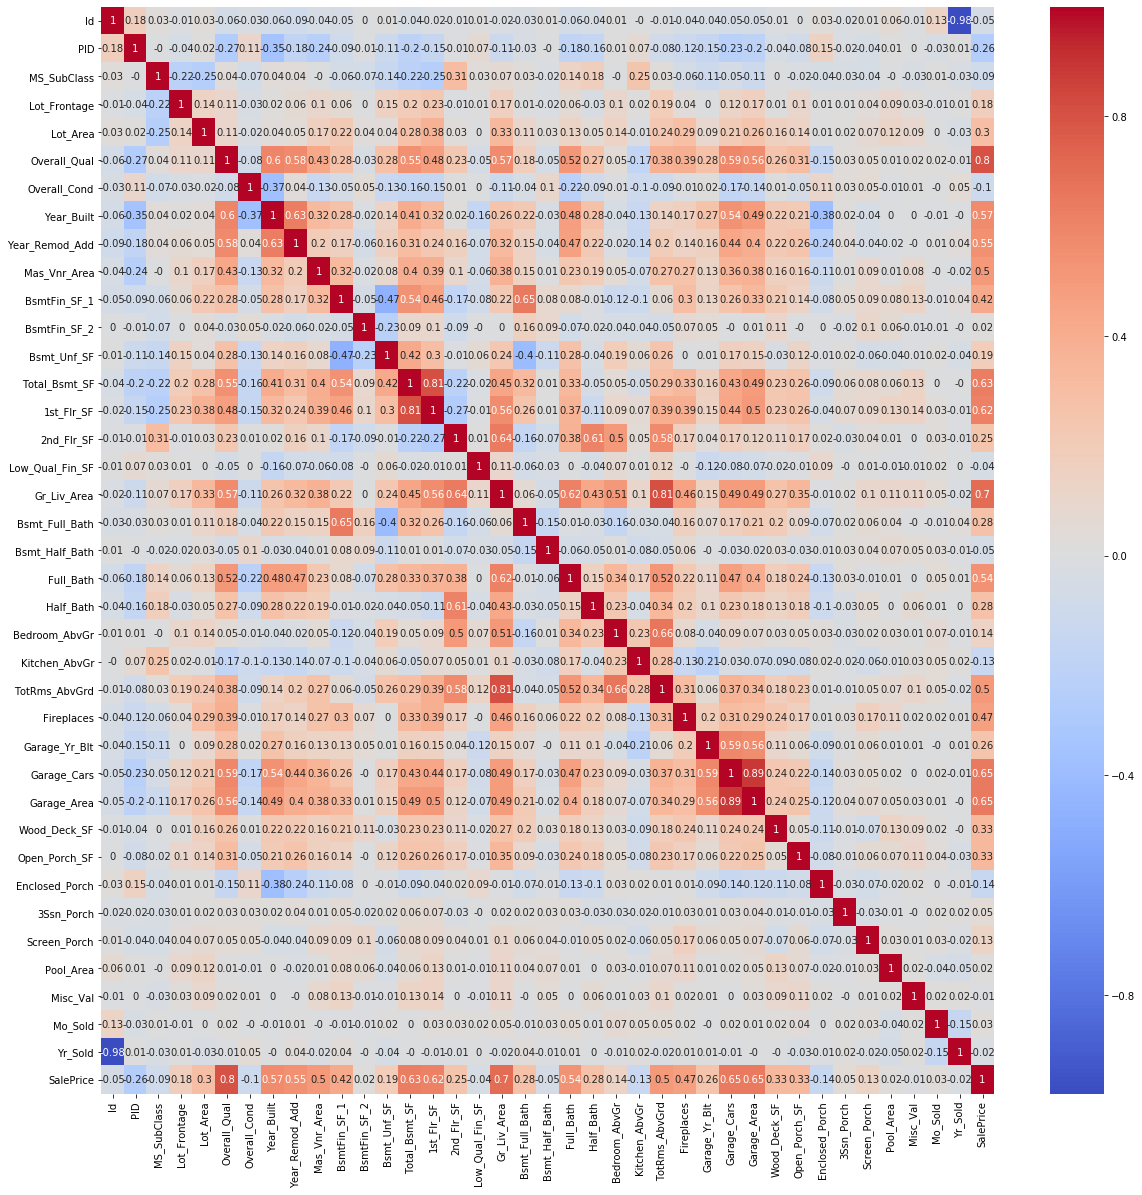

In [17]:
# Let's create a heatmap of the entire data frame.
# Not very pleasing to the eye, right?
plt.figure(figsize = (20,20))
sns.heatmap(np.round(train.corr(), 2), annot = True, cmap = 'coolwarm')

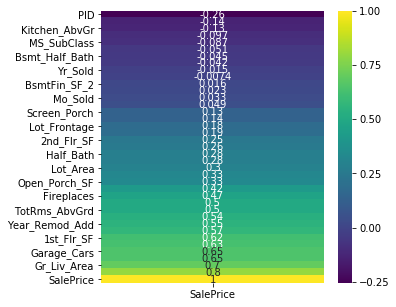

In [18]:
# Let's make a simple heat map on what column we're trying to predict to see correlations.
plt.figure(figsize = (5,5))
sns.heatmap(np.round(train.corr()[['SalePrice']].sort_values('SalePrice'), 30), annot = True, cmap = 'viridis')

In [19]:
# Let's see the same thing without a colorful graph to fully understand the correlations.
train.corr()['SalePrice'].sort_values()

PID               -0.255052
Enclosed_Porch    -0.135656
Kitchen_AbvGr     -0.125444
Overall_Cond      -0.097019
MS_SubClass       -0.087335
Id                -0.051398
Bsmt_Half_Bath    -0.045290
Low_Qual_Fin_SF   -0.041594
Yr_Sold           -0.015203
Misc_Val          -0.007375
BsmtFin_SF_2       0.016432
Pool_Area          0.023106
Mo_Sold            0.032735
3Ssn_Porch         0.048732
Screen_Porch       0.134581
Bedroom_AbvGr      0.137067
Lot_Frontage       0.181456
Bsmt_Unf_SF        0.190861
2nd_Flr_SF         0.248452
Garage_Yr_Blt      0.258645
Half_Bath          0.283001
Bsmt_Full_Bath     0.283332
Lot_Area           0.296566
Wood_Deck_SF       0.326490
Open_Porch_SF      0.333476
BsmtFin_SF_1       0.423856
Fireplaces         0.471093
Mas_Vnr_Area       0.503579
TotRms_AbvGrd      0.504014
Full_Bath          0.537969
Year_Remod_Add     0.550370
Year_Built         0.571849
1st_Flr_SF         0.618486
Total_Bsmt_SF      0.629303
Garage_Cars        0.647781
Garage_Area        0

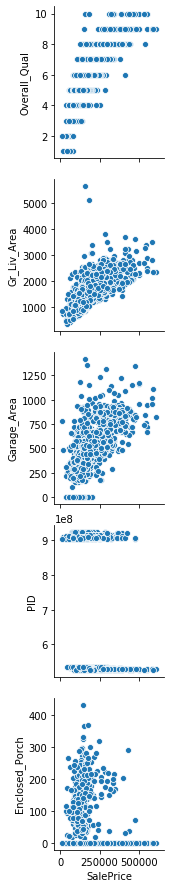

In [20]:
# Creates a pairplot of the features we deem to be important in the most correlation & least correlation in accordance of 'SalesPrice'
sns.pairplot(train, y_vars = ['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'PID', 'Enclosed_Porch'], x_vars = ['SalePrice'])

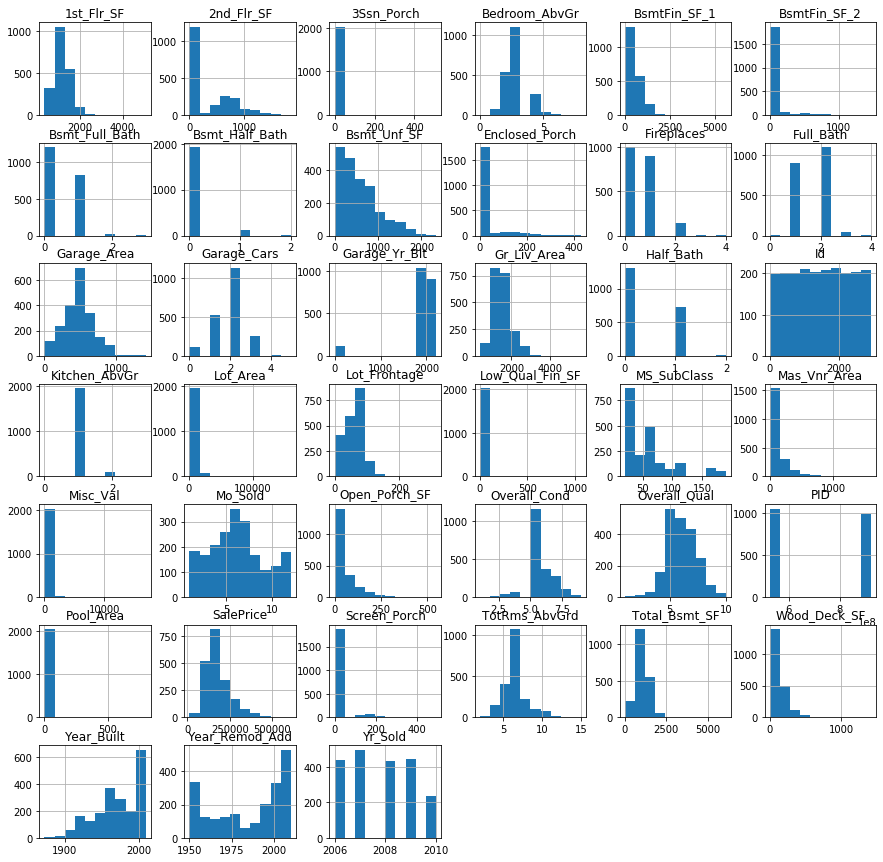

In [21]:
# Plots subplots of all the features in the data frame.
train.hist(figsize = (15, 15));

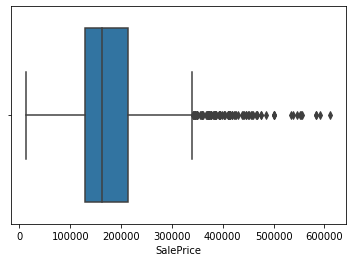

In [22]:
# Makes a box plot on the 'SalePrice' column
sns.boxplot(train['SalePrice'])

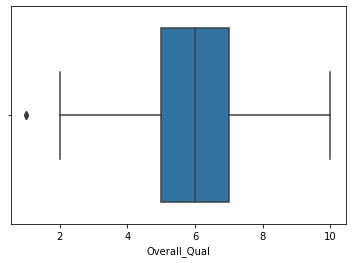

In [23]:
# Makes a box plot on the 'Overall_Qual' column
sns.boxplot(train['Overall_Qual'])

In [24]:
# Our features variable is important here in establishing what X is.
# We use list comprehension to loop through the train data frame, in all the numeric columns
    # only excluding our y-variable, or our predicator, in this case 'SalePrice'.
features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
X = train[features]
y = train['SalePrice']

### Model Prep: Train/Test Split


In [25]:
# Let's train test split our data.
# Data we use is usually split into training data & test data. The training set contains a 
    # known output & the model learns on this data in order to be generalized to other data 
    # later on. We have the test dataset (or subset) in order to test our model’s prediction 
    # on this subset.
# Remember that our X is our giant features of all numeric columns excluding 'salesPrice,'
    # where as our y-variable is our predicting variable or our 'salesPrice'.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [26]:
# It transforms the data in such a manner that it has mean as 0 & standard deviation as 1. 
# It standardizes the data. Standardization is useful for data which has negative values. 
# It arranges the data in a normal distribution. 
# However, It is more useful in classification than regression.
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Model Prep: Instantiate Our Models


In [27]:
lr = LinearRegression()

In [28]:
lasso = LassoCV(n_alphas = 200)

In [29]:
ridge = RidgeCV(alphas = np.linspace(.1, 10, 100))

### Cross validation
Use `cross_val_score` to evaluate all three models.

In [30]:
# We want to do cross validation on the 3 models to see which model is the best for modeling 
    # our data.
# Cross validation is very similar to train/test split, but it’s applied to more subsets. 
# Meaning, we can split our data into k subsets & train on k-1, one of those subsets. 
# What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

In [31]:
# We can then apply this to a linear regression model.
lr_scores = cross_val_score(lr, X_train, y_train, cv = 3)
lr_scores.mean()

0.7552764982201948

In [32]:
# We can then apply this to a lasso regression model.
lasso_scores = cross_val_score(lasso, X_train, y_train, cv = 3)
lasso_scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7597319915086637

In [33]:
# We can then apply this to a ridge regression model.
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 3)
ridge_scores.mean()

0.7574954751237414

### Model Fitting and Evaluation

In [34]:
# We don’t want over fitting or under fitting to occur because they affect the predictability 
    # of our model.
# Overfitting means that model we trained has trained “too well” & is now, well, fit 
    # too closely to the training dataset. This usually happens when the model is too complex.
# Under fitting means that the model does not fit the training data & therefore misses the 
    # trends in the data. It also means the model cannot be generalized to new data.

#### Ridge Regression Model: Train Data

In [35]:
# Let's now fit our model of choice so there's no overfitting or underfitting
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [36]:
ridge.score(X_train, y_train)

0.8305705343629314

In [37]:
ridge.score(X_test, y_test)

0.8651010951914011

In [38]:
ridge_scores.mean()

0.7574954751237414

In [39]:
pred = ridge.predict(X_test)

In [40]:
r2_score(y_test, pred)

0.8651010951914012

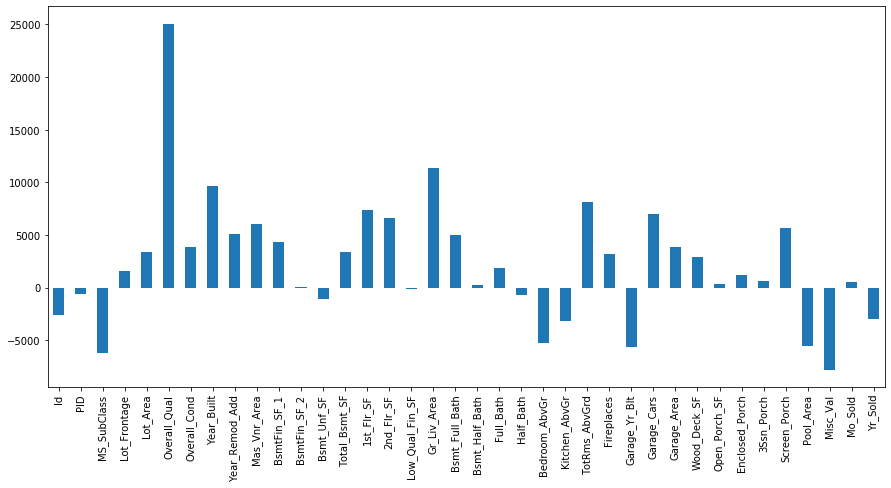

In [41]:
# Graph of the ridge coefficients based off of the features being correlated with it.
pd.Series(ridge.coef_, index = features).plot.bar(figsize = (15, 7))

In [42]:
residuals = y_test - pred

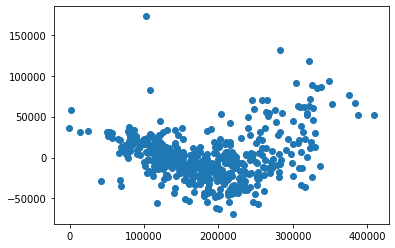

In [43]:
# Let's see what plotting the residuals look like graph.
plt.scatter(pred, residuals)

#### Ridge Regression Model: Test Data

In [44]:
ybar = train.SalePrice.mean()
ybar

181469.70160897123

In [45]:
first_submission_example = pd.DataFrame(test.Id)

In [46]:
first_submission_example['SalePrice'] = ybar

In [47]:
first_submission_example.to_csv('/Users/AakashSharma/Documents/DSI/Submissions/Project2/datasets/predict_test1.csv')

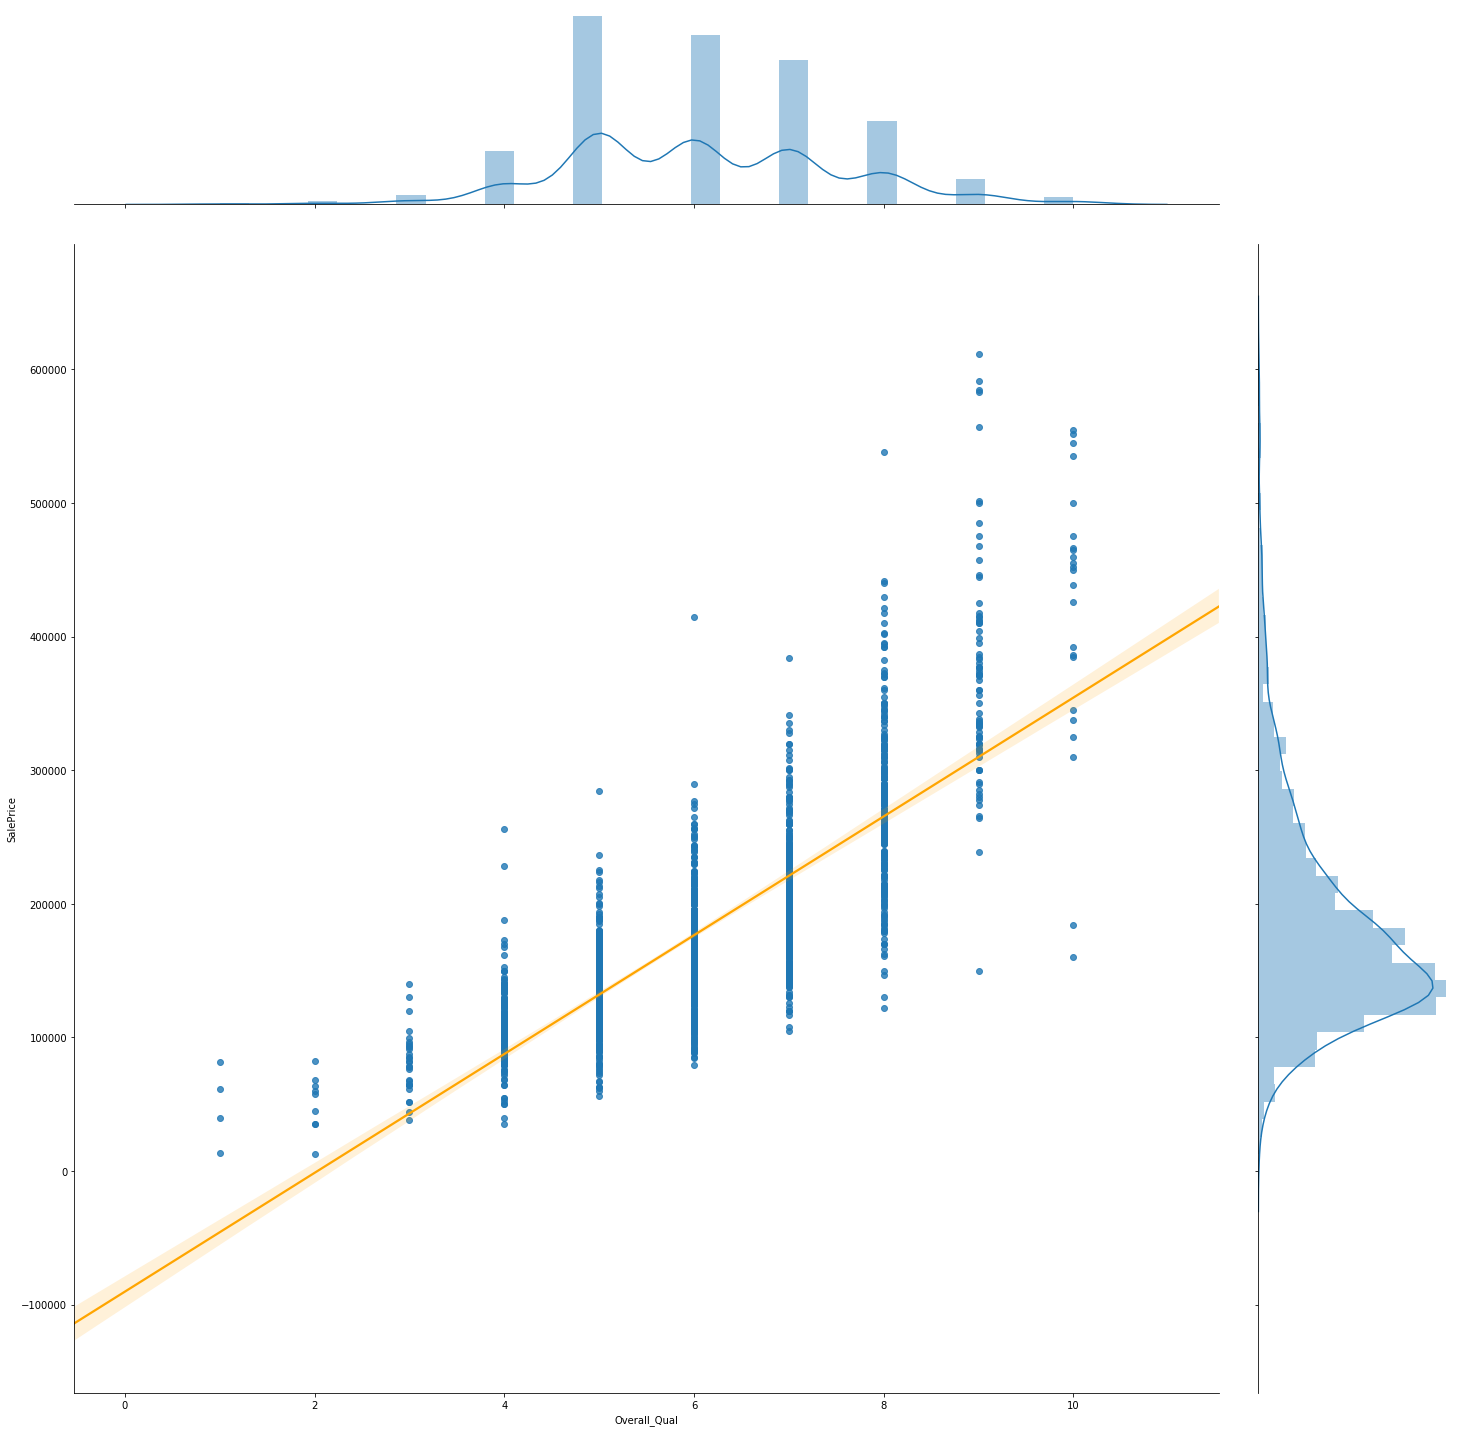

In [48]:
sns.jointplot(x = "Overall_Qual", y = "SalePrice", data = train, kind = "reg", height = 20, line_kws = {'color': 'orange'});

## Business Recommendations
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?